In [1]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split

iris_df = sns.load_dataset('iris') # データセットの読み込み
iris_df = iris_df[(iris_df['species']=='versicolor') | (iris_df['species']=='virginica')] # 簡単のため、2品種に絞る


X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] # 説明変数
Y = iris_df['species'].map({'versicolor': 0, 'virginica': 1}) # versicolorをクラス0, virginicaをクラス1とする
x_train, x_test, y_train, y_test = train_test_split(X.values, Y.values, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする

In [3]:
from sklearn.linear_model import LogisticRegression, LinearRegression

model = LogisticRegression()

In [4]:
# 学習
model.fit(x_train, y_train)

# 予測
pred = model.predict(x_test)


In [5]:
pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=pred))
print('precision = ', precision_score(y_true=y_test, y_pred=pred))
print('recall = ', recall_score(y_true=y_test, y_pred=pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=pred))


confusion matrix = 
 [[ 8  2]
 [ 0 10]]
accuracy =  0.9
precision =  0.8333333333333334
recall =  1.0
f1 score =  0.9090909090909091


In [7]:
from metamodel.binary import BinaryMetaModel

metamodel = BinaryMetaModel(
    model1=LogisticRegression(),
    model2=LogisticRegression()
)

In [8]:
y_train

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [9]:
# 学習
metamodel.fit(x_train, y_train)

# 予測
pred = metamodel.predict(x_test)


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=pred))
print('precision = ', precision_score(y_true=y_test, y_pred=pred))
print('recall = ', recall_score(y_true=y_test, y_pred=pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=pred))


confusion matrix = 
 [[ 8  2]
 [ 0 10]]
accuracy =  0.9
precision =  0.8333333333333334
recall =  1.0
f1 score =  0.9090909090909091


In [12]:
metamodel = BinaryMetaModel(
    model1=LogisticRegression(),
    model2=LinearRegression()
)

In [13]:
# 学習
metamodel.fit(x_train, y_train)

# 予測
pred = metamodel.predict(x_test)


In [14]:
pred

array([[ 0.04055637],
       [ 0.96765461],
       [ 0.02669654],
       [ 1.03385863],
       [ 0.93066933],
       [ 0.99271873],
       [ 0.03032399],
       [ 0.9086589 ],
       [ 0.99984176],
       [ 0.95572606],
       [ 0.94777039],
       [ 0.94915823],
       [ 0.99400424],
       [ 0.03569076],
       [-0.05596957],
       [-0.01260852],
       [ 0.89322958],
       [-0.01801676],
       [ 0.90754237],
       [ 0.00391434]])

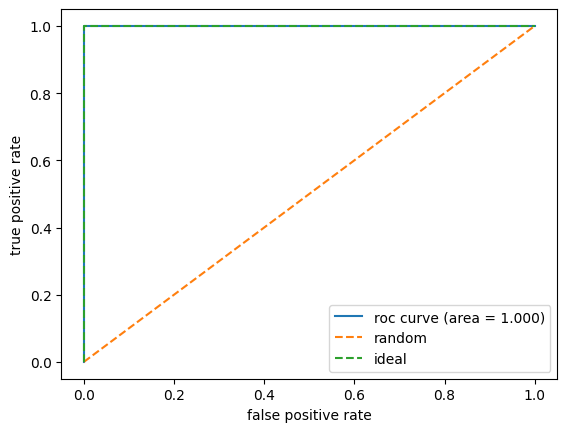

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=pred)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
